<center><h1>Telco Churn Project</h1></center>

<a name ='toc'></a>
# Table of Contents 
1. [Project Summary](#project_summary)
    1. [Project Objectives](#project_objectives)
    2. [Business Goals](#business_goals)
    3. [Audience](#audience)
    4. [Deliverables](#deliverables)
    5. [Inital Hypotheses](#inital_hyp)
2. [Executive Summary](#exe_summ)
3. [Acquire Data](#acquire)
    1. [Data Dictonary](#data_dict)
    2. [Data Description](#data_desc)
    3. [Acquire Takeaways](#acquire_takeaways)
5. [Prepare Data](#prep_data)
    1. [Distributions](#distributions)
    2. [Prepare Takeaways](#prepare_takeaways)
2. [Data Acqisition](#data_acquisition)
6. [Exploratory Data Analysis](#exp_data_analysis)
2. [Drivers of Churn](#drivers_of_churn)
3. [Machine Learning Construction](#ml_construction)
7. [Statistical Testing](#stat_testing)
8. [Modeling](#modeling)
9. [Model Evaluation](#model_eval)




<hr style="border-top: 10px groove tan; margin-top: 5px; margin-bottom: 5px"></hr>

<a name='project_summary'></a>
## Project Summary

<a name='project_objectives'></a>
### Project Objectives 
> - Create a Jupyter Notebook Report that shows processes and analysis with the goal of finding drivers for customer churn.
> - Within README.md file, include project description with goals, inital hypotheses, a data dictonary, project planning, instructions on how to recreate your project, answers to hypotheses, key findings, recommendations, and takeaways from the project.
> - CSV file with customer_id, probabilty of churn, and prediction of churn (1 = churn, 0 = not_churn). These predictions will be dervied from the best performing model on the test portion of the data. 
> - Any abstracted modules that are created to make the presentation more clean, during the acquistion and preparation of data.
> - Notebook walkthrough and presentation with a high-level overview of the entire project.

<a name='business_goals'></a>
### Business Goals 
> - Find drivers for customer churn at Telco. Why are customers churning?
> - Construct a machine-learning classification model that accurately predicts customer churn.
> - Document your process well enough to be presented or read like a report.

<a name='audience'></a>
### Audience 
> - Target audience is the Codeup Data Science Team.

<a name='deliverables'></a>
### Deliverables
> - A final report within Juypter Notebooks
> - A final report presentation using Juypter Notebooks
> - Modules necessary to recreate project


<a name='inital_hyp'></a>
### Inital Hypotheses


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='exe_sum'></a>
## Executive Summary


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='acquire'></a>
## Acquire Data

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Visualizations
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# ML Modeling


# Custom Modules
from acquire import *
from prepare import *


<a name='data_dict'></a>
### Data Dictionary

| Target                | Datatype               | Definition   |
|:----------------------|:-----------------------|:-------------|
| churn                 | 7043 non-null: object  |describes if the customer has churned|




| Feature               | Datatype               | Definition   |
|:----------------------|:-----------------------|:-------------|
| customer_id           | 7043 non-null: object  |unique customer identifier|
| gender                | 7043 non-null: object  |identifies customer gender|
| senior_citizen        | 7043 non-null: int64   |describes if customer is senior citizen|
| partner               | 7043 non-null: object  |describes if customer has a partner|
| dependents            | 7043 non-null: object  |describes if customer has dependents|
| tenure                | 7043 non-null: int64   |quantifies length of serivce from customer|
| phone_service         | 7043 non-null: object  |describes if customer has phone service|
| multiple_lines        | 7043 non-null: object  |describes if customer has multiple phone lines|
| online_security       | 7043 non-null: object  |describes if customer has online security|
| online_backup         | 7043 non-null: object  |describes if customer has online backup|
| device_protection     | 7043 non-null: object  |describes if customer has device protection|
| tech_support          | 7043 non-null: object  |describes if customer has tech support|
| streaming_tv          | 7043 non-null: object  |describes if customer has tv streaming|
| streaming_movies      | 7043 non-null: object  |describes if customer has movie streaming|
| paperless_billing     | 7043 non-null: object  |describes if customer uses paperless billing|
| monthly_charges       | 7043 non-null: float64 |quantifies average monthly charges|
| total_charges         | 7043 non-null: object  |quantifies all charges for customer|
| contract_type         | 7043 non-null: object  |describes customer contract type|
| internet_service_type | 7043 non-null: object  |describes customer internet service type|
| payment_type          | 7043 non-null: object  |describes customer service payment type|

In [2]:
# import telco_data from from CSV if it exists, otherwise import from mySQL
df = get_telco_data()
print(df.shape)

# These are the markdown format data_dicts that define the project
target_dict, feature_dict = fetch_data_dict(df)

(7043, 21)




<a name='data_desc'></a>
### Data Description

<style>
  table {margin-left: 0 !important;}
</style>
|                       |   count |        mean |         std |   min |    25% |     50% |     75% |     max |
|:----------------------|--------:|------------:|------------:|------:|-------:|--------:|--------:|--------:|
| gender                |    7043 |    0.504756 |    0.500013 |  0    |   0    |    1    |    1    |    1    |
| senior_citizen        |    7043 |    0.162147 |    0.368612 |  0    |   0    |    0    |    0    |    1    |
| partner               |    7043 |    0.483033 |    0.499748 |  0    |   0    |    0    |    1    |    1    |
| dependents            |    7043 |    0.299588 |    0.45811  |  0    |   0    |    0    |    1    |    1    |
| tenure                |    7043 |   32.3711   |   24.5595   |  0    |   9    |   29    |   55    |   72    |
| phone_service         |    7043 |    0.903166 |    0.295752 |  0    |   1    |    1    |    1    |    1    |
| multiple_lines        |    7043 |    0.615505 |    0.656039 |  0    |   0    |    1    |    1    |    2    |
| online_security       |    7043 |    0.720006 |    0.796885 |  0    |   0    |    1    |    1    |    2    |
| online_backup         |    7043 |    0.77822  |    0.778472 |  0    |   0    |    1    |    1    |    2    |
| device_protection     |    7043 |    0.777226 |    0.778826 |  0    |   0    |    1    |    1    |    2    |
| tech_support          |    7043 |    0.723555 |    0.795896 |  0    |   0    |    1    |    1    |    2    |
| streaming_tv          |    7043 |    0.817691 |    0.763212 |  0    |   0    |    1    |    1    |    2    |
| streaming_movies      |    7043 |    0.821241 |    0.761725 |  0    |   0    |    1    |    1    |    2    |
| paperless_billing     |    7043 |    0.592219 |    0.491457 |  0    |   0    |    1    |    1    |    1    |
| monthly_charges       |    7043 |   64.7617   |   30.09     | 18.25 |  35.5  |   70.35 |   89.85 |  118.75 |
| total_charges         |    7043 | 2279.73     | 2266.79     |  0    | 398.55 | 1394.55 | 3786.6  | 8684.8  |
| churn                 |    7043 |    0.26537  |    0.441561 |  0    |   0    |    0    |    1    |    1    |
| contract_type         |    7043 |    1.30953  |    0.833755 |  0    |   1    |    2    |    2    |    2    |
| internet_service_type |    7043 |    0.872923 |    0.737796 |  0    |   0    |    1    |    1    |    2    |
| payment_type          |    7043 |    1.66193  |    1.16332  |  0    |   1    |    2    |    3    |    3    |
    

In [3]:
# Print to get data description formatted
data_desc = format_data_description(df)

<a name='acquire_takeaways'></a>
### Acquire Takeaways
* Wrote a SQL query to acquire telco from Codeup Database.
* Using `acquire.py` we will create and cache the created CSV file if it doesn't exist, otherwise it will return the file.
* There are 7043 rows and 21 columns within the inital data query.
* The `customer_id`column doesn't offer any insight into customer churn, as each observation contains a unique id, so we will drop this column.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='prep_data'></a>
## Prepare Data


<a name='distributions'></a>
### Distributions
|||
|-|-|
|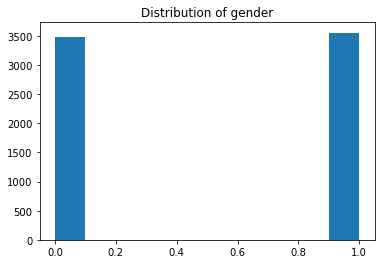|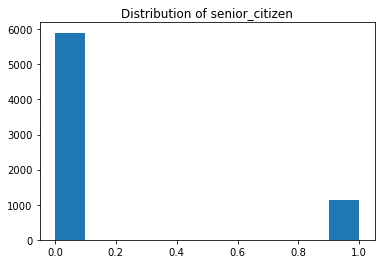|
|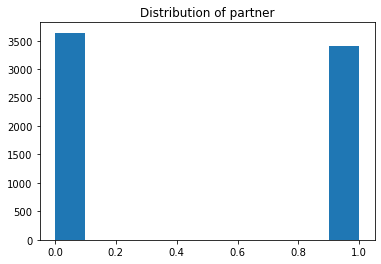|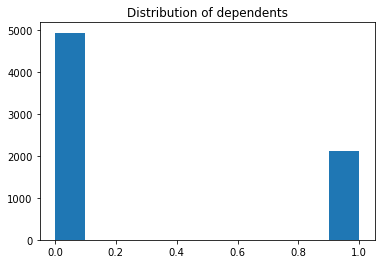|
|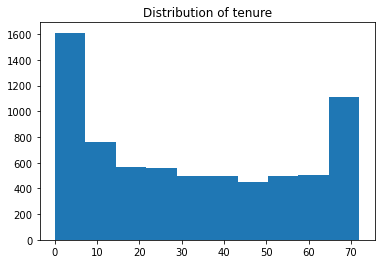|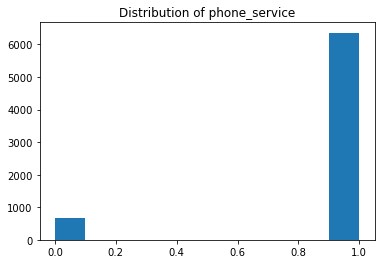|
|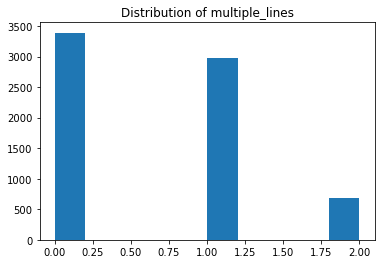|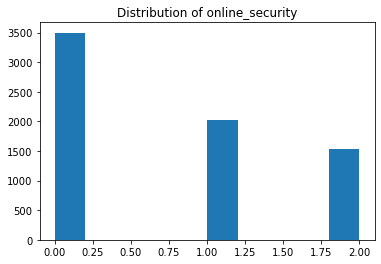|
|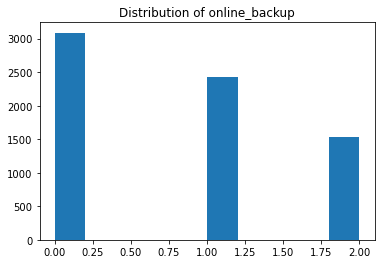|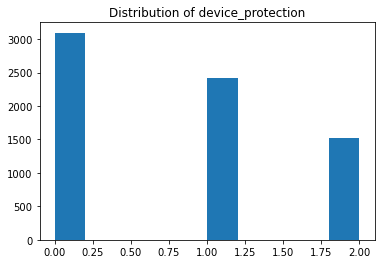|
|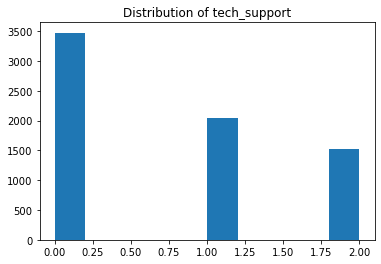|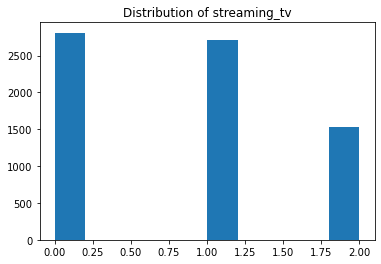|
|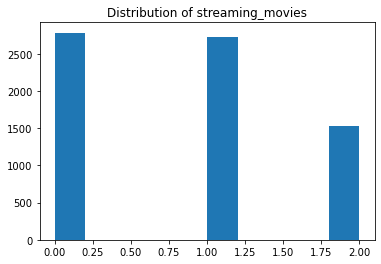|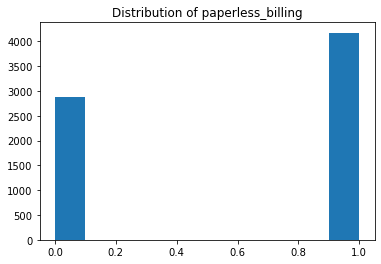|
|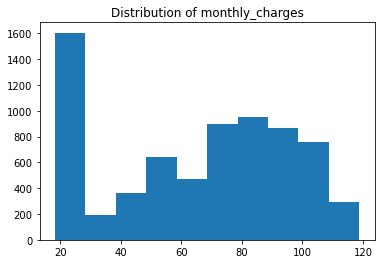|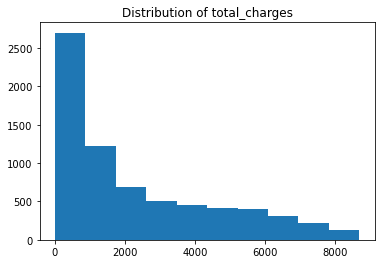|
|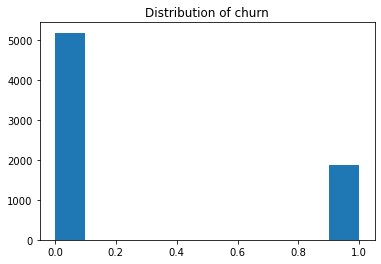|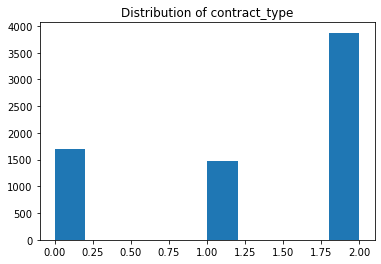|
|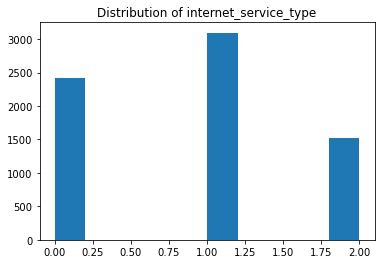|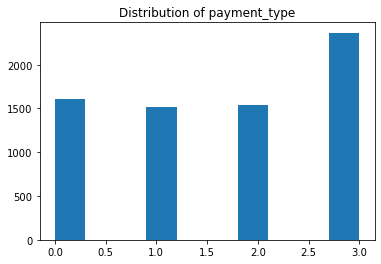|

In [4]:
# # Show distrubtions from all columns
# show_dists(df)

In [10]:
train, validate, test = train_validate_test_split(df, 'churn')

print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (3943, 20)
Validate: (1691, 20)
Test: (1409, 20)


<a name='prepare_takeaways'></a>
### Prepare Takeaways
* The column `total_charges` was formatted as a string (object) and needed to be as a float 64, there were 11 values that were blank. However, upon further inspection we could see that these were the ones with 0 tenure, meaning they were new customers and hadn't incurred a monthly bill yet, so I put their values to be 0.
* The distrubtion of `tenure` appears to be mostly uniformly distributed.
* `total_charges` has a J-shaped distribution.
* `monthly_charges` appears to have a biomodal distrubtion.
* Those who `churn` compose about 25% of the data.
* Data has been split into train, validate, and test datasets, stratifying my `churn` column.
* I changed the values for all non-int based columns into 1's and 0's so they could be used within the ML modeling. Below is the replacement key:

```python
replace_key = {
    'gender': {'Female': 0, 'Male': 1},
    'partner': {'Yes': 1, 'No': 0},
    'dependents': {'Yes': 1, 'No': 0},
    'phone_service': {'Yes': 1, 'No': 0},
    'multiple_lines': {'Yes': 1, 'No': 0, 'No phone service': 2},
    'online_security': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'online_backup': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'device_protection': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'tech_support': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'streaming_tv': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'streaming_movies': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'paperless_billing': {'Yes': 1, 'No': 0},
    'churn': {'Yes': 1, 'No': 0},
    'contract_type': {'Two year': 0, 'One year': 1, 'Month-to-month': 2},
    'internet_service_type': {'DSL': 0, 'Fiber optic': 1, 'None': 2},
    'payment_type': {'Mailed check': 0, 'Credit card (automatic)': 1,
                     'Bank transfer (automatic)': 2, 'Electronic check': 3}
```

                     
<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='explore'></a>
## Explore Data

In [6]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>